Exploratory Data Analysis

Understanding the trends of Indians relocation to different countries through the decades. 
Dataset --> Kaggle

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('IndianMigrationHistory1.3.csv')
df.head()

,Country Origin Name,Country Origin Code,Migration by Gender Name,Migration by Gender Code,Country Dest Name,Country Dest Code,1960 [1960],1970 [1970],1980 [1980],1990 [1990],2000 [2000]
0,India,IND,Female,FEM,Afghanistan,AFG,9521,11578,2872,2234,4445
1,India,IND,Female,FEM,Albania,ALB,1,2,2,2,2
2,India,IND,Female,FEM,Algeria,DZA,6,2,2,1,0
3,India,IND,Female,FEM,American Samoa,ASM,0,0,2,3,4
4,India,IND,Female,FEM,Andorra,AND,2,13,3,6,8


In [10]:
df.shape


(462, 11)

In [11]:
df.describe()

,Country Origin Name,Country Origin Code,Migration by Gender Name,Migration by Gender Code,Country Dest Name,Country Dest Code,1960 [1960],1970 [1970],1980 [1980],1990 [1990],2000 [2000]
count,462,462,462,462,462,462,462,462,462,462,462
unique,1,1,2,2,231,231,207,233,244,267,278
top,India,IND,Female,FEM,Afghanistan,AFG,0,0,0,0,0
freq,462,462,231,231,2,2,108,97,85,66,44


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country Origin Name       462 non-null    object
 1   Country Origin Code       462 non-null    object
 2   Migration by Gender Name  462 non-null    object
 3   Migration by Gender Code  462 non-null    object
 4   Country Dest Name         462 non-null    object
 5   Country Dest Code         462 non-null    object
 6   1960 [1960]               462 non-null    object
 7   1970 [1970]               462 non-null    object
 8   1980 [1980]               462 non-null    object
 9   1990 [1990]               462 non-null    object
 10  2000 [2000]               462 non-null    object
dtypes: object(11)
memory usage: 39.8+ KB


In [13]:
df.columns

Index(['Country Origin Name', 'Country Origin Code',
       'Migration by Gender Name', 'Migration by Gender Code',
       'Country Dest Name', 'Country Dest Code', '1960 [1960]', '1970 [1970]',
       '1980 [1980]', '1990 [1990]', '2000 [2000]'],
      dtype='object')

In [16]:
year_columns = ['1960 [1960]', '1970 [1970]', '1980 [1980]', '1990 [1990]', '2000 [2000]']
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

In [22]:
mean_per_year = df[year_columns].mean()
mean_per_year

1960 [1960]    20092.665929
1970 [1970]    18275.816372
1980 [1980]    16774.526549
1990 [1990]    18089.792035
2000 [2000]    21054.911504
dtype: float64

In [24]:
df_melted = df.melt(id_vars=['Country Origin Name', 'Country Origin Code', 'Migration by Gender Name', 'Migration by Gender Code', 'Country Dest Name', 'Country Dest Code'],
                    value_vars=year_columns,
                    var_name='Year',
                    value_name='Migration Numbers')

df_melted['Year'] = df_melted['Year'].str.extract('(\d{4})').astype(int)

In [25]:
df_melted

,Country Origin Name,Country Origin Code,Migration by Gender Name,Migration by Gender Code,Country Dest Name,Country Dest Code,Year,Migration Numbers
0,India,IND,Female,FEM,Afghanistan,AFG,1960,9521.0
1,India,IND,Female,FEM,Albania,ALB,1960,1.0
2,India,IND,Female,FEM,Algeria,DZA,1960,6.0
3,India,IND,Female,FEM,American Samoa,ASM,1960,0.0
4,India,IND,Female,FEM,Andorra,AND,1960,2.0
...,...,...,...,...,...,...,...,...
2305,India,IND,Male,MAL,Wallis and Futuna,WLF,2000,2.0
2306,India,IND,Male,MAL,West Bank and Gaza,PSE,2000,213.0
2307,India,IND,Male,MAL,"Yemen, Rep.",YEM,2000,7034.0
2308,India,IND,Male,MAL,Zambia,ZMB,2000,2414.0


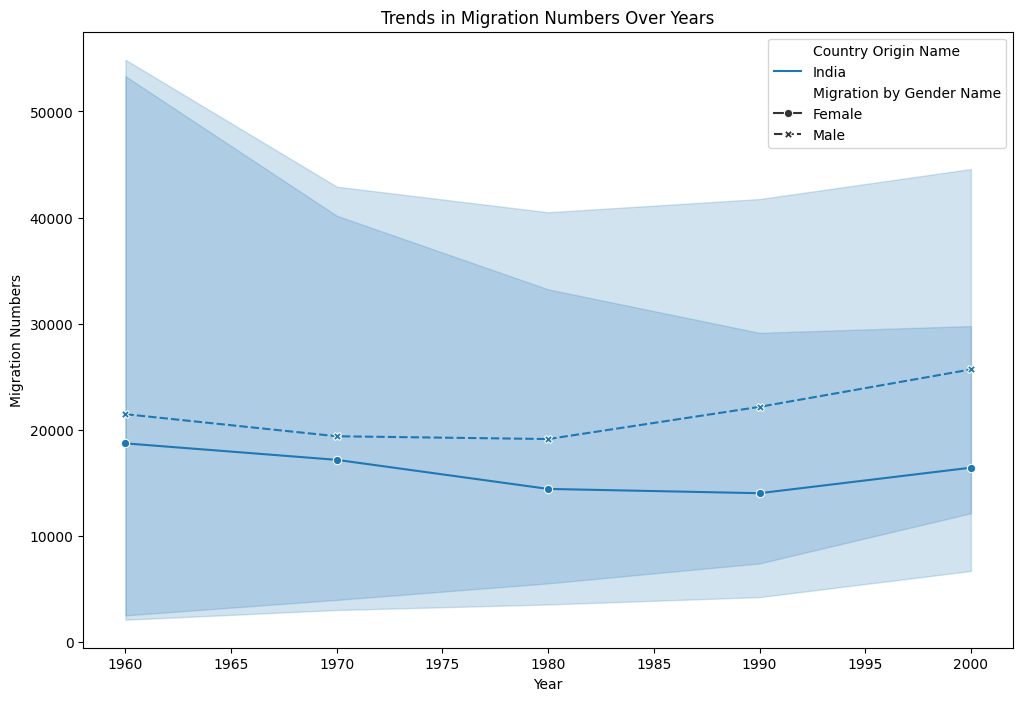

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Year', y='Migration Numbers', hue='Country Origin Name', style='Migration by Gender Name', markers=True)
plt.title('Trends in Migration Numbers Over Years')
plt.xlabel('Year')
plt.ylabel('Migration Numbers')
plt.show()
